In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [6]:
# 데이터 전처리
import spacy

ModuleNotFoundError: No module named 'spacy'

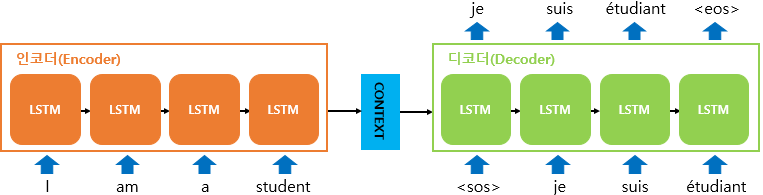

In [3]:
# Encoder 구현
class Encoder(nn.Module):
    def __init__(self, input_size, hidden_size):
        super(Encoder, self).__init__()
        self.hidden_size = hidden_size
        self.embedding = nn.Embedding(input_size, hidden_size)
        
        # encoder 구성을 보통 LSTM, GRU, RNN 층으로 구성하는 편?
        self.lstm = nn.LSTM(hidden_size, hidden_size)
         
    def forward(self, x, hidden):
        x = self.embedding(x).view(1, 1, -1)
        x, hidden = self.lstm(x, hidden)
        return x, hidden # 한 lstm 을 지날 때마다 hidden state를 내뱉음

# Decoder 구현
class Decoder(nn.Module):
    # encoder 이후 마지막 hidden_state가 context vector로 들어감
    def __init__(self, hidden_size, output_size ): # input size 와 output size 가 같을 필요가 없음
        super(Decoder, self).__init__()
        self.hidden_size = hidden_size
        self.embedding = nn.Embedding(output_size, hidden_size) #???
        self.lstm = nn.LSTM(hidden_size, hidden_size)
        self.linear = nn.Linear(hidden_size, output_size)
        
    def forward(self, x, hidden):
        x = self.embedding(x).view(1, 1, -1)
        x, hidden = self.lstm(x, hidden) # 두 인자의 의미..?
        x = self.linear(x)
        return x, hidden

In [ ]:
# Seq2Seq 구현
class Seq2Seq(nn.Module):
    def __init__(self, encoder, decoder, device):
        super(Seq2Seq, self).__init__()
        self.encoder = encoder
        self.decoder = decoder
        self.device = device
    
    def forward(self, )